# Air Quality Index Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

## Exploration of Data

In [2]:
df = pd.read_csv('Data/data.csv')

df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [3]:
print("df.shape : ", df.shape)

df.shape :  (1093, 9)


In [4]:
print(df.columns)

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


- **T**  	  Average Temperature (°C)            
- **TM**	  Maximum temperature (°C)             
- **Tm**	  Minimum temperature (°C)                 
- **SLP**	  Atmospheric pressure at sea level (hPa)          
- **H**	  Average relative humidity (%)           
- **PP**	  Total rainfall and / or snowmelt (mm)          
- **VV**    Average visibility (Km)           
- **V**	  Average wind speed (Km/h)               
- **VM**    Maximum sustained wind speed (Km/h)            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [6]:
df[df['PM 2.5'].isnull()]

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
184,14.3,19.2,10.9,1020.5,91.0,1.6,4.8,11.1,NaN


In [7]:
df.fillna(method='ffill', inplace = True)

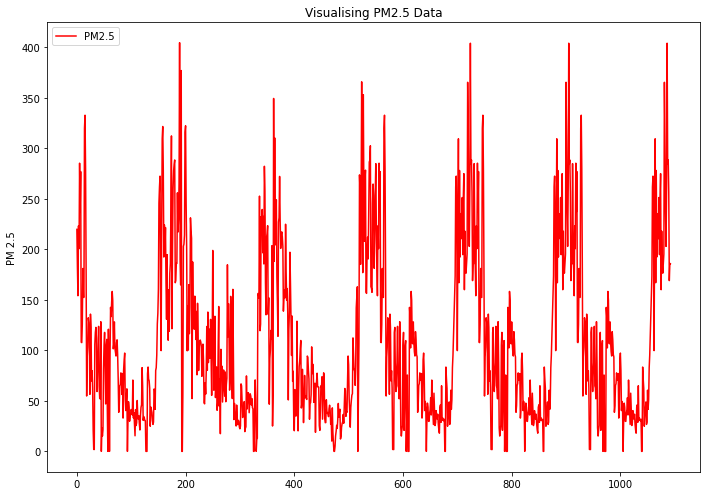

In [8]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM 2.5"], color="red", label="PM2.5")
plt.title('Visualising PM2.5 Data')
plt.show()

In [9]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
         T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
731   16.9  25.1   6.6  1021.3  65.0  1.1   2.0   7.6  284.795833
732   15.5  24.1   7.7  1021.0  71.0  1.1   3.5  11.1  219.720833
733   14.9  22.8   8.0  1018.4  73.0  1.1   5.9  13.0  182.187500
734   18.3  24.7  11.5  1018.1  85.0  0.5   1.1   7.6  154.037500
735   16.5  24.7  12.0  1017.4  82.0  0.6   8.0  13.0  223.208333
...    ...   ...   ...     ...   ...  ...   ...   ...         ...
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333

[362 rows x 9 columns]


In [10]:
df = df[df.duplicated() == False]

print(df.shape)

(731, 9)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       731 non-null    float64
 1   TM      731 non-null    float64
 2   Tm      731 non-null    float64
 3   SLP     731 non-null    float64
 4   H       731 non-null    float64
 5   VV      731 non-null    float64
 6   V       731 non-null    float64
 7   VM      731 non-null    float64
 8   PM 2.5  731 non-null    float64
dtypes: float64(9)
memory usage: 57.1 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
T,731.0,25.556908,7.286760,6.7,18.850000,27.700000,31.2000,38.5
TM,731.0,32.231874,6.852548,9.8,27.550000,34.100000,36.9000,45.5
Tm,731.0,19.273598,7.454202,0.0,12.000000,21.000000,25.9000,32.7
SLP,731.0,1008.196854,7.564601,991.5,1001.300000,1008.500000,1015.0000,1023.2
H,731.0,64.134063,15.460460,20.0,55.000000,66.000000,75.0000,98.0
VV,731.0,1.891929,0.686446,0.3,1.400000,1.900000,2.4000,5.8
V,731.0,6.630369,3.967064,0.4,3.500000,6.300000,9.1000,24.4
VM,731.0,15.696580,7.654019,1.9,11.100000,14.800000,18.3000,57.6
PM 2.5,731.0,108.036007,82.570588,0.0,43.583333,81.833333,154.0375,404.5


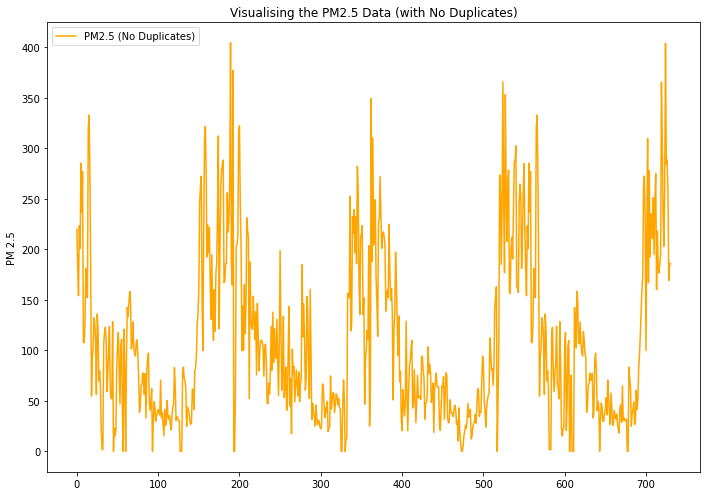

In [13]:
# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM 2.5"], color="orange", label="PM2.5 (No Duplicates)")
plt.title('Visualising the PM2.5 Data (with No Duplicates)')
plt.show()

## EDA

In [14]:
pm_ = list(df['PM 2.5'])

Acceptable = []

for pm in pm_:
    if pm >= 151:
        Acceptable.append(0)
    else:
        Acceptable.append(1)

df['Acceptable'] = Acceptable

df.sample(3)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5,Acceptable
676,30.7,34.0,25.0,1000.5,65.0,3.4,12.0,27.8,31.750000,1
173,16.0,26.1,9.1,1014.4,81.0,1.0,1.1,5.4,239.125000,0
266,37.8,45.1,28.6,993.3,34.0,1.9,6.7,18.3,76.208333,1


1    536
0    195
Name: Acceptable, dtype: int64


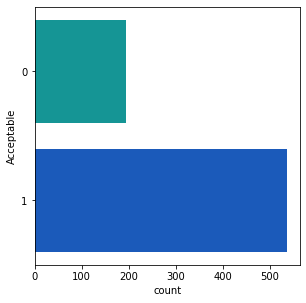

In [15]:
# figure size in inches
rcParams['figure.figsize'] = 4.75,4.75

print(df.Acceptable.value_counts())

sns.countplot(y = "Acceptable", data = df, palette = 'winter_r')
plt.show()

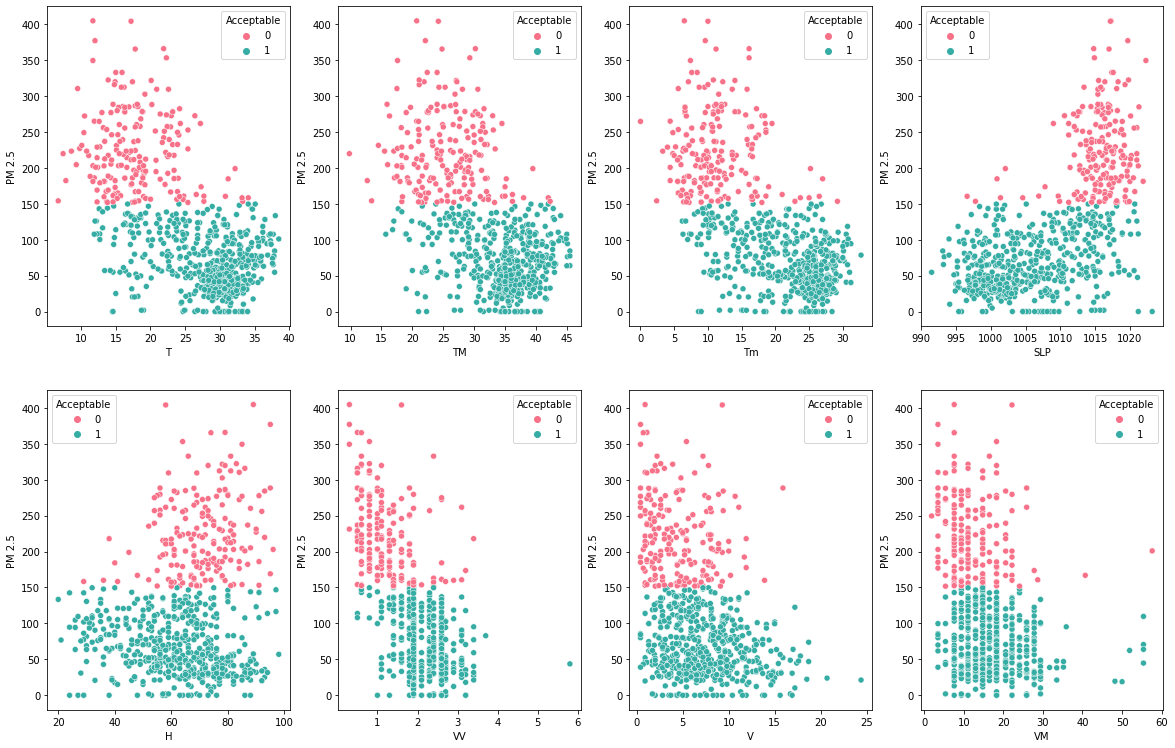

In [16]:
cols =  list(df.columns)

plt.figure(figsize=(20, 20))

for i in range(1, 9):
    plt.subplot(3, 4, i)
    sns.scatterplot(x = cols[i - 1], y = df['PM 2.5'],data = df, hue = "Acceptable", palette = "husl")

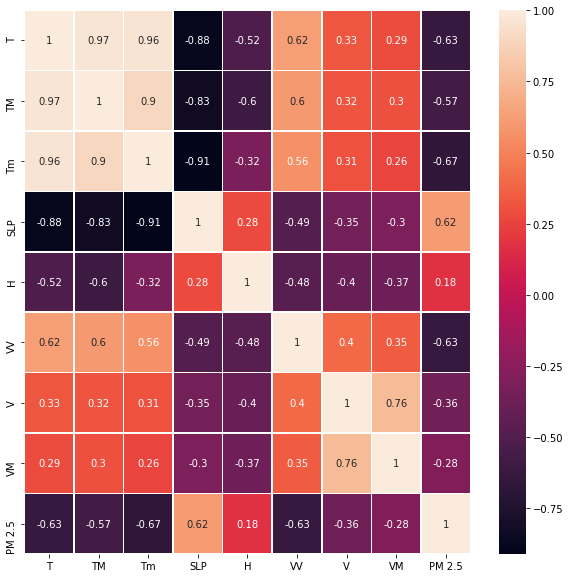

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index[:-1] # dropping 'Acceptable'

plt.figure(figsize=(10,10))

#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot = True, linewidths=.5)
# print(corrmat)
plt.show()

# Feature Selection & Data Splitting

In [18]:
from sklearn.model_selection import train_test_split

X = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]
y = df['PM 2.5']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [19]:
print('Length of X_train', len(X_train))
print('Length of X_val', len(X_val))
print('Length of y_train', len(y_train))
print('Length of y_val', len(y_val))

Length of X_train 657
Length of X_val 74
Length of y_train 657
Length of y_val 74


### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.score : ", lr.score(X_val, y_val))
print("lr.coef_ : ",lr.coef_)
print("lr.intercept_ : ",lr.intercept_)

lr.score :  0.4933766804600192
lr.coef_ :  [ 1.90077649e+00  3.92929463e-02 -6.37936282e+00  4.71165649e-01
 -9.67942560e-01 -5.27430742e+01 -2.49218585e+00  2.09558903e-02]
lr.intercept_ :  -115.14163346023537


In [21]:
print("lr.score of training data: ", lr.score(X_train, y_train))

lr.score of training data:  0.5903625219690201


In [22]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr , X, y, cv = 5)

print(score)
print("Mean score : ",score.mean())

[0.51308156 0.48833908 0.64009098 0.5746025  0.11785428]
Mean score :  0.46679367929828286


In [23]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
T,1.900776
TM,0.039293
Tm,-6.379363
SLP,0.471166
H,-0.967943
VV,-52.743074
V,-2.492186
VM,0.020956


In [24]:
from sklearn import metrics

prediction = lr.predict(X_val)

print('MAE:', metrics.mean_absolute_error(y_val, prediction))
print('MSE:', metrics.mean_squared_error(y_val, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, prediction)))

MAE: 37.2971868476013
MSE: 2512.6778183058614
RMSE: 50.12661786222826


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 1000, random_state = 0)
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [26]:
print("RF.score : ", RF.score(X_val, y_val))


RF.score :  0.5133891176496983


In [27]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RF , X, y, cv = 5)

print(score)
print("Mean score : ",score.mean())

[0.50942779 0.45647742 0.51522775 0.61463353 0.40867011]
Mean score :  0.5008873217548298


# ElasticNet Model

In [28]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
print("ElasticNEt.score : ", regr.score(X_val, y_val))

ElasticNEt.score :  0.4564403562027414


In [29]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regr , X, y, cv = 5)

print(score)
print("Mean score : ",score.mean())

[0.39451548 0.37215938 0.53659073 0.53348805 0.45007942]
Mean score :  0.45736661174851606


# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
print("DT.score : ", regressor.score(X_val, y_val))

DT.score :  0.18680439828567452


In [31]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor , X, y, cv = 5)

print(score)
print("Mean score : ",score.mean())

[ 0.26001511 -0.02404868 -0.04749673  0.46075474  0.28159946]
Mean score :  0.18616478023623384


# Voting Regressor

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
er.fit(X, y)
print("VOT.score : ", er.score(X_val, y_val))

VOT.score :  0.7944418625116543


In [33]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(er , X, y, cv = 5)

print(score)
print("Mean score : ",score.mean())

[0.54862359 0.50961099 0.63302937 0.60537549 0.35760136]
Mean score :  0.5308481624480745


#### Saving the Model as pickle file

In [34]:
import pickle

# open a file, where you ant to store the data
file = open('Models/model.pkl', 'wb')

# dump information to that file
pickle.dump(er, file)